In [1]:
# Import Libraries 

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# parameters 

batch_size = 64
in_features, hid_features, out_features = 784, 30, 10
learning_rate = 1e-3
epochs = 10

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('../data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data)

In [4]:
class Net(nn.Module):
    
    def __init__(self, in_features, hidden_dim, out_features):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(in_features, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.layer2 = nn.Linear(hidden_dim, out_features)
       
        
    def forward(self, x):     
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        return x
    
model = Net(in_features,hid_features,out_features)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), learning_rate) 

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.325868
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.135644
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.676561
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.640033
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.433734

Test set: Average loss: 0.3811, Accuracy: 9088/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.361147
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.447270
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.432586
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.217821
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.245744

Test set: Average loss: 0.2724, Accuracy: 9268/10000 (93%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.345737
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.323133
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.165581
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.193577
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.207602

Test set: Average loss: 0.2347, Accuracy: 9337/10000 (93%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.235163
Train Epoch: 4 [12800/60000 (21%)]	Lo

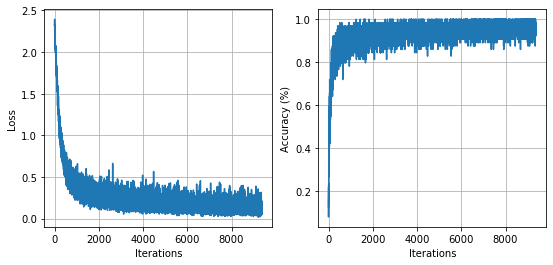

In [5]:
# Training Loop 

train_losses = []
train_accs = []

for epoch in range(epochs):

    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Flatten input to 1D tensor
        x_batch = x_batch.flatten(start_dim=1)

        # Perform forward pass
        optimizer.zero_grad()
        y_pred = model.forward(x_batch)
        loss = criterion(y_pred,y_batch)
        train_losses.append(loss.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy of prediction
        correct = torch.argmax(y_pred, axis=1) == y_batch
        train_accs.append(torch.sum(correct)/len(y_pred))
        
        # Print progress
        if i % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch + 1, i * len(x_batch), len(train_loader.dataset),
                100. * i / len(train_loader), loss))

    # Validation loop    
    test_loss = 0
    total_correct = 0
    for x_batch, y_batch in test_loader:
        # Flatten input to 1D tensor
        x_batch = x_batch.flatten(start_dim=1)

        # Perform forward pass with x_xor as input and y_pred as output variables
        y_pred = model.forward(x_batch)
        loss = criterion(y_pred,y_batch)
        # Keep track of total loss over test set
        test_loss += loss

        # Calculate accuracy of prediction
        correct = torch.argmax(y_pred, axis=1) == y_batch
        total_correct += torch.sum(correct)

    test_loss /= len(test_loader.dataset)
    test_acc = 100. * total_correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, total_correct, len(test_loader.dataset), test_acc))
    
# Plot training curves
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(train_losses)
plt.grid()

plt.subplot(1,2,2)
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.plot(train_accs)
plt.grid()

0
tensor([[ 7.0949, -5.9280,  1.3396, -3.0367, -3.6090, -0.7812, -2.1941, -3.1273,
         -3.0205, -3.9076]], grad_fn=<AddmmBackward0>)
tensor([[0]])


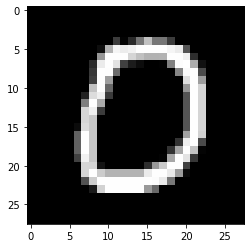

In [6]:
img, label = test_data[10]
print(label)
plt.imshow(img.squeeze(), cmap="gray")
img = img.view(-1, 28*28)
output = model(img)
print(output)
pred = output.data.max(1, keepdim=True)[1]
print(pred)